In [1]:
from pylab import *
import pandas as pd
from itertools import permutations

In [2]:
rutacon = '../Uso/Conjuntos/'
#orden idiomas
e1 = "EN"
e2 = "FR"
e3 = "GE"
e4 = "IT"
e5 = "SP"

Idiomas = [e1, e2, e3, e4, e5]

e_ab_a = e1 + '-' + e2
e_ac_a = e1 + '-' + e3
e_ad_a = e1 + '-' + e4
e_ae_a = e1 + '-' + e5

e_ab_b = e2 + '-' + e1
e_ac_b = e2 + '-' + e3
e_ad_b = e2 + '-' + e4
e_ae_b = e2 + '-' + e5

e_ab_c = e3 + '-' + e1
e_ac_c = e3 + '-' + e2
e_ad_c = e3 + '-' + e4
e_ae_c = e3 + '-' + e5

e_ab_d = e4 + '-' + e1
e_ac_d = e4 + '-' + e2
e_ad_d = e4 + '-' + e3
e_ae_d = e4 + '-' + e5

e_ab_e = e5 + '-' + e1
e_ac_e = e5 + '-' + e2
e_ad_e = e5 + '-' + e3
e_ae_e = e5 + '-' + e4


#detalles esteticos del codigo
C1_EN = [0, 0.52, 0.67]
C2_EN = [0.78, 0.95, 1]

C1_FR = [1, 0.46, 0]
C2_FR = [1, 0.8, 0.36]

C1_GE = [0.53, 0, 0.7]
C2_GE = [0.91, 0.77, 0.95]

C1_IT = [0.19, 0.51, 0.02]
C2_IT = [0.58, 1, 0.53]

C1_SP = [0.64, 0, 0]
C2_SP = [1, 0.51, 0.38]

Yearst = list(arange(1900, 2007, 1))

In [3]:
USO_ab_a = load(rutacon+ 'USO_ab_a.npy')
USO_ac_a = load(rutacon+ 'USO_ac_a.npy')
USO_ad_a = load(rutacon+ 'USO_ad_a.npy')
USO_ae_a = load(rutacon+ 'USO_ae_a.npy')
USO_ab_b = load(rutacon+ 'USO_ab_b.npy')
USO_ac_b = load(rutacon+ 'USO_ac_b.npy')
USO_ad_b = load(rutacon+ 'USO_ad_b.npy')
USO_ae_b = load(rutacon+ 'USO_ae_b.npy')
USO_ab_c = load(rutacon+ 'USO_ab_c.npy')
USO_ac_c = load(rutacon+ 'USO_ac_c.npy')
USO_ad_c = load(rutacon+ 'USO_ad_c.npy')
USO_ae_c = load(rutacon+ 'USO_ae_c.npy')
USO_ab_d = load(rutacon+ 'USO_ab_d.npy')
USO_ac_d = load(rutacon+ 'USO_ac_d.npy')
USO_ad_d = load(rutacon+ 'USO_ad_d.npy')
USO_ae_d = load(rutacon+ 'USO_ae_d.npy')
USO_ab_e = load(rutacon+ 'USO_ab_e.npy')
USO_ac_e = load(rutacon+ 'USO_ac_e.npy')
USO_ad_e = load(rutacon+ 'USO_ad_e.npy')
USO_ae_e = load(rutacon+ 'USO_ae_e.npy')


In [4]:
DAT = [
    
    USO_ab_a,
    USO_ac_a,
    USO_ad_a,
    USO_ae_a,
    
    USO_ab_b,
    USO_ac_b,
    USO_ad_b,
    USO_ae_b,
    
    USO_ab_c,
    USO_ac_c,
    USO_ad_c,
    USO_ae_c,
    
    USO_ab_d,
    USO_ac_d,
    USO_ad_d,
    USO_ae_d,
    
    USO_ab_e,
    USO_ac_e,
    USO_ad_e,
    USO_ae_e,
  ]

ET = [
    
    e_ab_a,
    e_ac_a,
    e_ad_a,
    e_ae_a,
    
    e_ab_b,
    e_ac_b,
    e_ad_b,
    e_ae_b,
    
    e_ab_c,
    e_ac_c,
    e_ad_c,
    e_ae_c,
    
    e_ab_d,
    e_ac_d,
    e_ad_d,
    e_ae_d,
    
    e_ab_e,
    e_ac_e,
    e_ad_e,
    e_ae_e,
  ]

In [5]:
def Obtener_combinaciones(l1):
    # Obtener todas las permutaciones posibles sin repetición
    combinaciones = list(permutations(l1, 2))
    
    # Convertir las tuplas a listas
    res = [list(comb) for comb in combinaciones]
    
    return res

def Retornos_periodo(listas_uso, etiquetas, periodo, idiomas):
    #lista de años
    Yearsgen = arange(1900, 2007, 1)
    Yearsper = arange(1900, 2007, periodo)
    
    DF = pd.DataFrame()    #dataframe de resultados
    for k in range(len(listas_uso)):
        #seleccionamos una lista de idiomas y su etiqueta
        lista_uso   = listas_uso[k]
        etiqueta    = etiquetas[k]
        
        #listas para guardar los resultados y anexarlos al dataframe
        Intervalo   = []             #periodo de tiempo
        Retornos    = []             #Retorno aritmertico
        Retornoslog = []             #Retorno logaritmico
        Idioma_A    = []             #Idioma A del uso
        Idioma_B    = []             #idioma B del uso 

        for y1 in Yearsper:
            y2 = y1 + periodo     #años entre los cuales se obtendra el retorno
            if y2 in Yearsgen:
                #y2 = Yearsgen[-1]
                ind1 = y1 - 1900
                ind2 = y2 - 1900
                uso1 = lista_uso[ind1]    #valor del uso en el año1
                uso2 = lista_uso[ind2]    #valor del uso en el año2
                retorno    = round( (uso2 - uso1) / uso1, 4)    #retorno aritmetico
                retornolog = round(log( uso2 / uso1), 4)        #retorno logaritmico
                #guardamos los resultados
                Intervalo.append(str(y1) + '-' + str(y2) )     
                Retornos.append(retorno)
                Retornoslog.append(retornolog)
                Idioma_A.append(etiqueta[:2])
                Idioma_B.append(etiqueta[-2:])
        #Creacion del dataframe para la pareja de idiomas        
        df = pd.DataFrame()
        df['IdiomaA']  = Idioma_A
        df['IdiomaB']  = Idioma_B
        df['Periodo']  = Intervalo
        df['Retornos'] = Retornos
        df['Retornoslog'] = Retornoslog
        #anexamos el dataframe de la pareja al dataframe general
        DF = pd.concat([DF, df], ignore_index=True)
    
    #commbinaciones de idiomas
    Combinaciones = Obtener_combinaciones(idiomas)
    IdiomaA      = []
    IdiomaB      = []
    Prom_periodo = []
    Max_periodo  = [] 
    Min_periodo  = []
    Fecha_Max    = []
    Fecha_Min    = [] 
    Prom_periodo_log = []
    Max_periodo_log  = [] 
    Min_periodo_log  = []
    Fecha_Max_log    = []
    Fecha_Min_log    = [] 
    for combinacion in Combinaciones:
        idioma1 = combinacion[0]
        idioma2 = combinacion[1]
        dn = DF[ (DF['IdiomaA'] == idioma1) & (DF['IdiomaB'] == idioma2)].reset_index(drop=True)
        IdiomaA.append(idioma1)
        IdiomaB.append(idioma2)


        Prom_periodo.append(round(dn.Retornos.mean(), 4) )
        Max_periodo.append(max(dn.Retornos) )
        Min_periodo.append(min(dn.Retornos) )
        Fecha_Max.append( dn.loc[dn['Retornos'] == max(dn.Retornos), 'Periodo' ].values[0] )
        Fecha_Min.append( dn.loc[dn['Retornos'] == min(dn.Retornos), 'Periodo' ].values[0] )

        Prom_periodo_log.append(round(dn.Retornoslog.mean(), 4) )
        Max_periodo_log.append(max(dn.Retornoslog) )
        Min_periodo_log.append(min(dn.Retornoslog) )
        Fecha_Max_log.append( dn.loc[dn['Retornoslog'] == max(dn.Retornoslog), 'Periodo' ].values[0] )    
        Fecha_Min_log.append( dn.loc[dn['Retornoslog'] == min(dn.Retornoslog), 'Periodo' ].values[0] )

    DS = pd.DataFrame()
    DS['Idioma_A'] = IdiomaA
    DS['Idioma_B'] = IdiomaB

    DS['Promedio']    = Prom_periodo
    DS['Max_periodo'] = Max_periodo
    DS['Fecha_Max']   = Fecha_Max  
    DS['Min_periodo'] = Min_periodo
    DS['Fecha_Min']   = Fecha_Min  

    DS['Promedio_log']    = Prom_periodo_log
    DS['Max_periodo_log'] = Max_periodo_log
    DS['Fecha_Max_log']   = Fecha_Max_log  
    DS['Min_periodo_log'] = Min_periodo_log
    DS['Fecha_Min_log']   = Fecha_Min_log  
    
    return DF,DS
            
        

In [12]:
DF5, DS5   = Retornos_periodo(DAT, ET, 5,  Idiomas)
DF10, DS10 = Retornos_periodo(DAT, ET, 10, Idiomas)

DF5.to_csv('Retornos_t5.csv', index=False)
DS5.to_csv('Reporte_retorno_t5.csv', index=False)

DF10.to_csv('Retornos_t10.csv', index=False)
DS10.to_csv('Reporte_retorno_t10.csv', index=False)

In [7]:
DF5

,IdiomaA,IdiomaB,Periodo,Retornos,Retornoslog
0,EN,FR,1900-1905,0.0398,0.0390
1,EN,FR,1905-1910,0.0075,0.0075
2,EN,FR,1910-1915,0.0513,0.0501
3,EN,FR,1915-1920,0.0297,0.0293
4,EN,FR,1920-1925,0.0240,0.0237
...,...,...,...,...,...
415,SP,IT,1980-1985,-0.0180,-0.0181
416,SP,IT,1985-1990,0.0027,0.0027
417,SP,IT,1990-1995,0.0131,0.0130
418,SP,IT,1995-2000,0.0308,0.0304


In [13]:
DS10

,Idioma_A,Idioma_B,Promedio,Max_periodo,Fecha_Max,Min_periodo,Fecha_Min,Promedio_log,Max_periodo_log,Fecha_Max_log,Min_periodo_log,Fecha_Min_log
0,EN,FR,0.0677,0.1401,1990-2000,-0.0074,1940-1950,0.0644,0.1311,1990-2000,-0.0075,1940-1950
1,EN,GE,0.0049,0.4780,1990-2000,-0.0964,1960-1970,-0.0066,0.3907,1990-2000,-0.1014,1960-1970
2,EN,IT,0.0058,0.1227,1930-1940,-0.1130,1910-1920,0.0038,0.1158,1930-1940,-0.1200,1910-1920
3,EN,SP,0.0826,0.2681,1900-1910,-0.0289,1910-1920,0.0765,0.2375,1900-1910,-0.0293,1910-1920
4,FR,EN,0.0271,0.1082,1960-1970,-0.0308,1970-1980,0.0260,0.1027,1960-1970,-0.0313,1970-1980
5,FR,GE,0.0710,0.1438,1920-1930,0.0149,1900-1910,0.0679,0.1343,1920-1930,0.0147,1900-1910
6,FR,IT,0.0489,0.2749,1990-2000,-0.2489,1980-1990,0.0356,0.2428,1990-2000,-0.2862,1980-1990
7,FR,SP,0.0078,0.1532,1970-1980,-0.2290,1900-1910,0.0029,0.1425,1970-1980,-0.2601,1900-1910
8,GE,EN,-0.0246,0.0412,1900-1910,-0.0905,1970-1980,-0.0258,0.0404,1900-1910,-0.0948,1970-1980
9,GE,FR,0.0087,0.0861,1940-1950,-0.0838,1920-1930,0.0067,0.0826,1940-1950,-0.0876,1920-1930


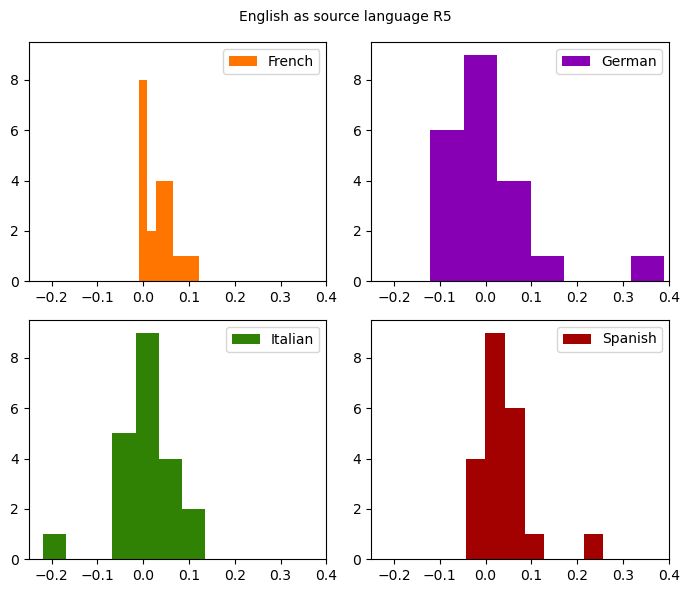

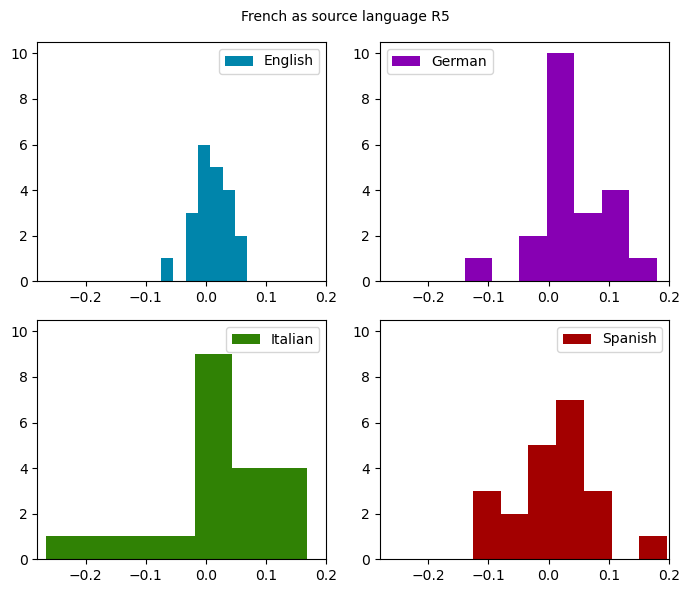

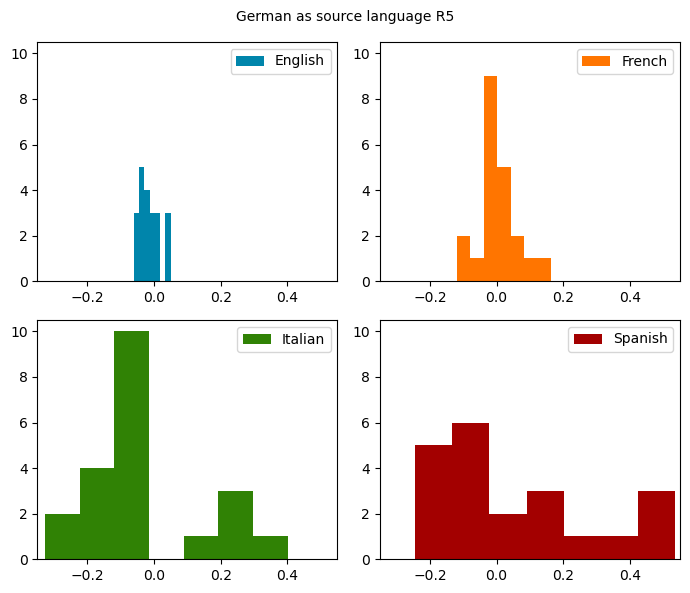

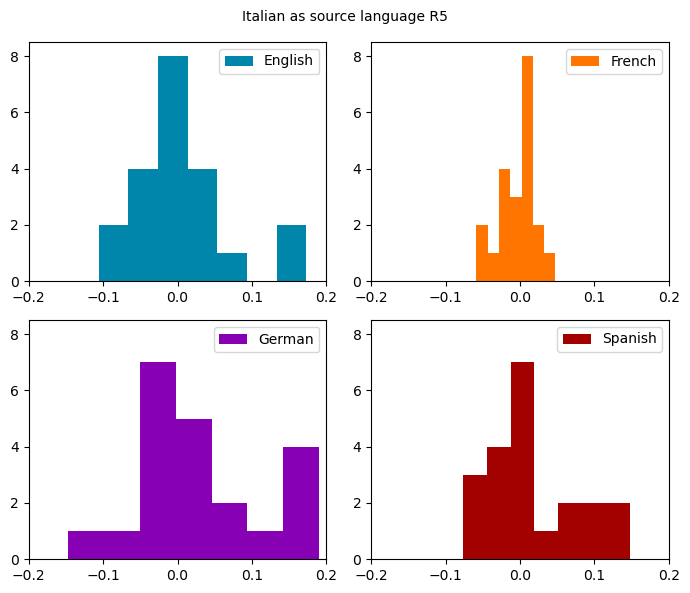

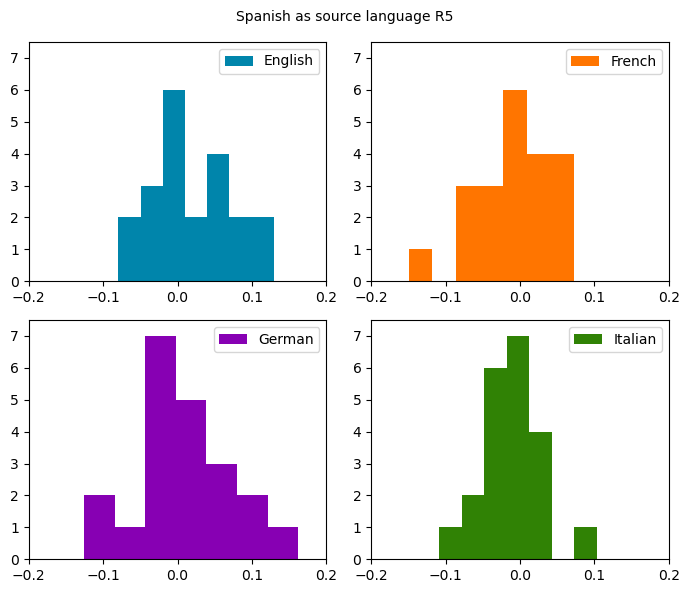

In [9]:
DF  = DF5.copy()

fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'EN' ) & (DF['IdiomaB'] == 'FR' ) ].Retornos.values, bins = 7, color = C1_FR, label = 'French')   
ax1.set_xlim(-0.25, 0.4)
ax1.set_ylim(0,9.5)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'EN' ) & (DF['IdiomaB'] == 'GE' ) ].Retornos.values, bins = 7, color = C1_GE, label = 'German')                 
ax2.set_xlim(-0.25, 0.4)
ax2.set_ylim(0,9.5)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'EN' ) & (DF['IdiomaB'] == 'IT' ) ].Retornos.values, bins = 7, color = C1_IT, label = 'Italian')   
ax3.set_xlim(-0.25, 0.4)
ax3.set_ylim(0,9.5)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'EN' ) & (DF['IdiomaB'] == 'SP' ) ].Retornos.values, bins = 7, color = C1_SP, label = 'Spanish')     
ax4.set_xlim(-0.25, 0.4)
ax4.set_ylim(0,9.5)
ax4.legend()

fig.suptitle('English as source language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_EN_A.png', bbox_inches = 'tight')

fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'FR' ) & (DF['IdiomaB'] == 'EN' ) ].Retornos.values, bins = 7, color = C1_EN, label = 'English')   
ax1.set_xlim(-0.28, 0.2)
ax1.set_ylim(0, 10.5)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'FR' ) & (DF['IdiomaB'] == 'GE' ) ].Retornos.values, bins = 7, color = C1_GE, label = 'German')                 
ax2.set_xlim(-0.28, 0.2)
ax2.set_ylim(0, 10.5)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'FR' ) & (DF['IdiomaB'] == 'IT' ) ].Retornos.values, bins = 7, color = C1_IT, label = 'Italian')   
ax3.set_xlim(-0.28, 0.2)
ax3.set_ylim(0, 10.5)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'FR' ) & (DF['IdiomaB'] == 'SP' ) ].Retornos.values, bins = 7, color = C1_SP, label = 'Spanish')     
ax4.set_xlim(-0.28, 0.2)
ax4.set_ylim(0, 10.5)
ax4.legend()

fig.suptitle('French as source language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_FR_A.png', bbox_inches = 'tight')

fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'GE' ) & (DF['IdiomaB'] == 'EN' ) ].Retornos.values, bins = 7, color = C1_EN, label = 'English')   
ax1.set_xlim(-0.35, 0.55)
ax1.set_ylim(0, 10.5)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'GE' ) & (DF['IdiomaB'] == 'FR' ) ].Retornos.values, bins = 7, color = C1_FR, label = 'French')                 
ax2.set_xlim(-0.35, 0.55)
ax2.set_ylim(0, 10.5)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'GE' ) & (DF['IdiomaB'] == 'IT' ) ].Retornos.values, bins = 7, color = C1_IT, label = 'Italian')   
ax3.set_xlim(-0.35, 0.55)
ax3.set_ylim(0, 10.5)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'GE' ) & (DF['IdiomaB'] == 'SP' ) ].Retornos.values, bins = 7, color = C1_SP, label = 'Spanish')     
ax4.set_xlim(-0.35, 0.55)
ax4.set_ylim(0, 10.5)
ax4.legend()

fig.suptitle('German as source language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_GE_A.png', bbox_inches = 'tight')

fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'IT' ) & (DF['IdiomaB'] == 'EN' ) ].Retornos.values, bins = 7, color = C1_EN, label = 'English')   
ax1.set_xlim(-0.2, 0.2)
ax1.set_ylim(0, 8.5)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'IT' ) & (DF['IdiomaB'] == 'FR' ) ].Retornos.values, bins = 7, color = C1_FR, label = 'French')                 
ax2.set_xlim(-0.2, 0.2)
ax2.set_ylim(0, 8.5)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'IT' ) & (DF['IdiomaB'] == 'GE' ) ].Retornos.values, bins = 7, color = C1_GE, label = 'German')   
ax3.set_xlim(-0.2, 0.2)
ax3.set_ylim(0, 8.5)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'IT' ) & (DF['IdiomaB'] == 'SP' ) ].Retornos.values, bins = 7, color = C1_SP, label = 'Spanish')     
ax4.set_xlim(-0.2, 0.2)
ax4.set_ylim(0, 8.5)
ax4.legend()

fig.suptitle('Italian as source language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_IT_A.png', bbox_inches = 'tight')

fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'SP' ) & (DF['IdiomaB'] == 'EN' ) ].Retornos.values, bins = 7, color = C1_EN, label = 'English')   
ax1.set_xlim(-0.2, 0.2)
ax1.set_ylim(0, 7.5)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'SP' ) & (DF['IdiomaB'] == 'FR' ) ].Retornos.values, bins = 7, color = C1_FR, label = 'French')                 
ax2.set_xlim(-0.2, 0.2)
ax2.set_ylim(0, 7.5)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'SP' ) & (DF['IdiomaB'] == 'GE' ) ].Retornos.values, bins = 7, color = C1_GE, label = 'German')   
ax3.set_xlim(-0.2, 0.2)
ax3.set_ylim(0, 7.5)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'SP' ) & (DF['IdiomaB'] == 'IT' ) ].Retornos.values, bins = 7, color = C1_IT, label = 'Italian')     
ax4.set_xlim(-0.2, 0.2)
ax4.set_ylim(0, 7.5)
ax4.legend()

fig.suptitle('Spanish as source language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_SP_A.png', bbox_inches = 'tight')

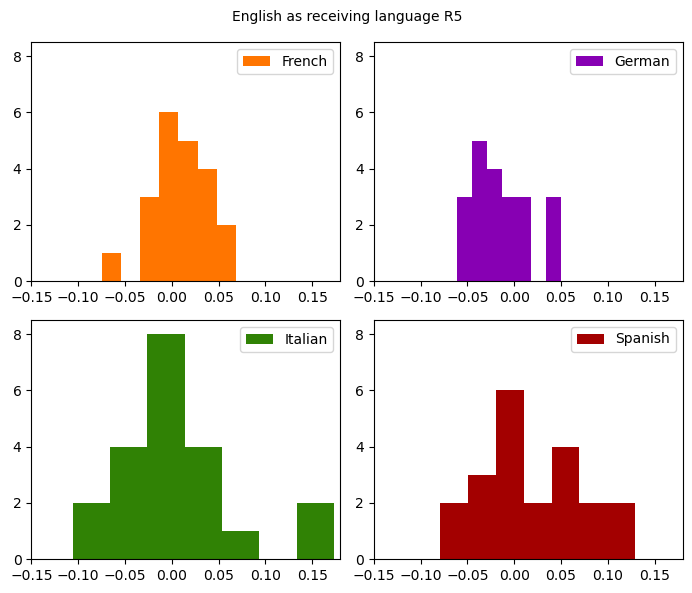

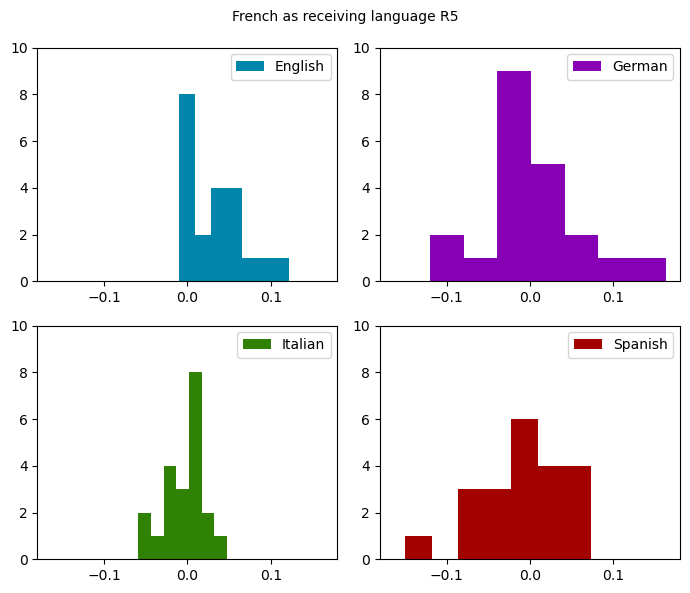

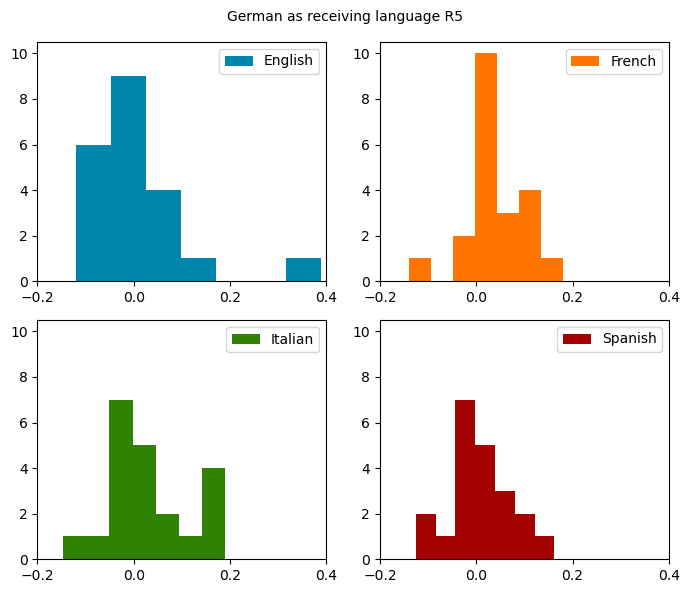

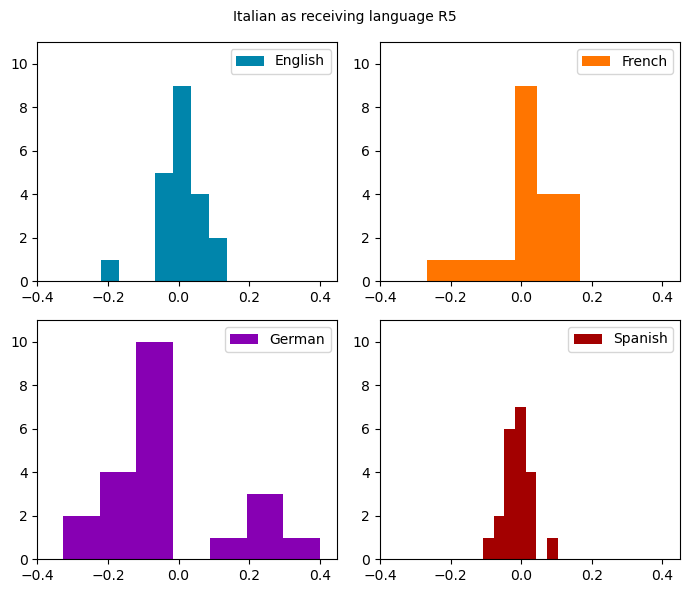

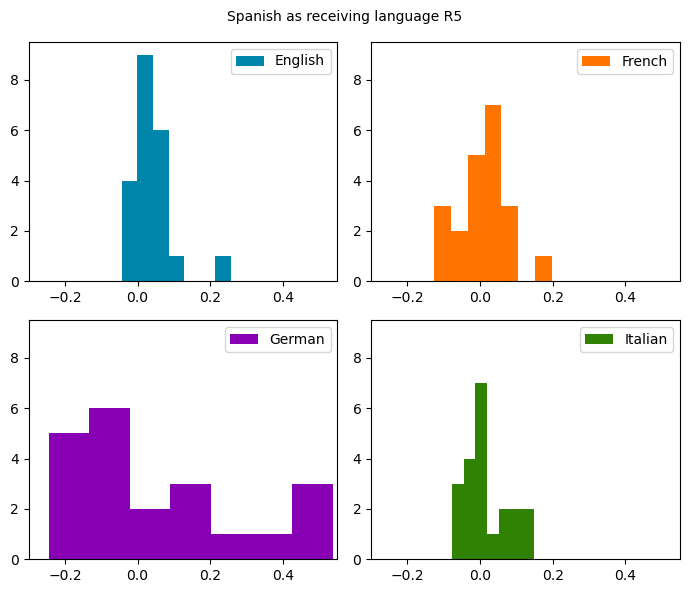

In [10]:
fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'FR' ) & (DF['IdiomaB'] == 'EN' ) ].Retornos.values, bins = 7, color = C1_FR, label = 'French')   
ax1.set_xlim(-0.15, 0.18)
ax1.set_ylim(0, 8.5)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'GE' ) & (DF['IdiomaB'] == 'EN' ) ].Retornos.values, bins = 7, color = C1_GE, label = 'German')                 
ax2.set_xlim(-0.15, 0.18)
ax2.set_ylim(0, 8.5)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'IT' ) & (DF['IdiomaB'] == 'EN' ) ].Retornos.values, bins = 7, color = C1_IT, label = 'Italian')   
ax3.set_xlim(-0.15, 0.18)
ax3.set_ylim(0, 8.5)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'SP' ) & (DF['IdiomaB'] == 'EN' ) ].Retornos.values, bins = 7, color = C1_SP, label = 'Spanish')     
ax4.set_xlim(-0.15, 0.18)
ax4.set_ylim(0, 8.5)
ax4.legend()

fig.suptitle('English as receiving language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_EN_B.png', bbox_inches = 'tight')

fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'EN' ) & (DF['IdiomaB'] == 'FR' ) ].Retornos.values, bins = 7, color = C1_EN, label = 'English')   
ax1.set_xlim(-0.18, 0.18)
ax1.set_ylim(0, 10)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'GE' ) & (DF['IdiomaB'] == 'FR' ) ].Retornos.values, bins = 7, color = C1_GE, label = 'German')                 
ax2.set_xlim(-0.18, 0.18)
ax2.set_ylim(0, 10)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'IT' ) & (DF['IdiomaB'] == 'FR' ) ].Retornos.values, bins = 7, color = C1_IT, label = 'Italian')   
ax3.set_xlim(-0.18, 0.18)
ax3.set_ylim(0, 10)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'SP' ) & (DF['IdiomaB'] == 'FR' ) ].Retornos.values, bins = 7, color = C1_SP, label = 'Spanish')     
ax4.set_xlim(-0.18, 0.18)
ax4.set_ylim(0, 10)
ax4.legend()

fig.suptitle('French as receiving language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_FR_B.png', bbox_inches = 'tight')


fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'EN' ) & (DF['IdiomaB'] == 'GE' ) ].Retornos.values, bins = 7, color = C1_EN, label = 'English')   
ax1.set_xlim(-0.2, 0.4)
ax1.set_ylim(0, 10.5)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'FR' ) & (DF['IdiomaB'] == 'GE' ) ].Retornos.values, bins = 7, color = C1_FR, label = 'French')                 
ax2.set_xlim(-0.2, 0.4)
ax2.set_ylim(0, 10.5)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'IT' ) & (DF['IdiomaB'] == 'GE' ) ].Retornos.values, bins = 7, color = C1_IT, label = 'Italian')   
ax3.set_xlim(-0.2, 0.4)
ax3.set_ylim(0, 10.5)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'SP' ) & (DF['IdiomaB'] == 'GE' ) ].Retornos.values, bins = 7, color = C1_SP, label = 'Spanish')     
ax4.set_xlim(-0.2, 0.4)
ax4.set_ylim(0, 10.5)
ax4.legend()

fig.suptitle('German as receiving language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_GE_B.png', bbox_inches = 'tight')

fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'EN' ) & (DF['IdiomaB'] == 'IT' ) ].Retornos.values, bins = 7, color = C1_EN, label = 'English')   
ax1.set_xlim(-0.4, 0.45)
ax1.set_ylim(0, 11)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'FR' ) & (DF['IdiomaB'] == 'IT' ) ].Retornos.values, bins = 7, color = C1_FR, label = 'French')                 
ax2.set_xlim(-0.4, 0.45)
ax2.set_ylim(0, 11)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'GE' ) & (DF['IdiomaB'] == 'IT' ) ].Retornos.values, bins = 7, color = C1_GE, label = 'German')   
ax3.set_xlim(-0.4, 0.45)
ax3.set_ylim(0, 11)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'SP' ) & (DF['IdiomaB'] == 'IT' ) ].Retornos.values, bins = 7, color = C1_SP, label = 'Spanish')     
ax4.set_xlim(-0.4, 0.45)
ax4.set_ylim(0, 11)
ax4.legend()

fig.suptitle('Italian as receiving language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_IT_B.png', bbox_inches = 'tight')


fig = plt.figure(figsize = [7,6])
ax1 = plt.subplot(2,2,1)
ax1.hist( DF [ (DF['IdiomaA'] == 'EN' ) & (DF['IdiomaB'] == 'SP' ) ].Retornos.values, bins = 7, color = C1_EN, label = 'English')   
ax1.set_xlim(-0.3, 0.55)
ax1.set_ylim(0, 9.5)
ax1.legend()

ax2 = plt.subplot(2,2,2)
ax2.hist( DF [ (DF['IdiomaA'] == 'FR' ) & (DF['IdiomaB'] == 'SP' ) ].Retornos.values, bins = 7, color = C1_FR, label = 'French')                 
ax2.set_xlim(-0.3, 0.55)
ax2.set_ylim(0, 9.5)
ax2.legend()

ax3 = plt.subplot(2,2,3)
ax3.hist( DF [ (DF['IdiomaA'] == 'GE' ) & (DF['IdiomaB'] == 'SP' ) ].Retornos.values, bins = 7, color = C1_GE, label = 'German')   
ax3.set_xlim(-0.3, 0.55)
ax3.set_ylim(0, 9.5)
ax3.legend()

ax4 = plt.subplot(2,2,4)
ax4.hist( DF [ (DF['IdiomaA'] == 'IT' ) & (DF['IdiomaB'] == 'SP' ) ].Retornos.values, bins = 7, color = C1_IT, label = 'Italian')     
ax4.set_xlim(-0.3, 0.55)
ax4.set_ylim(0, 9.5)
ax4.legend()

fig.suptitle('Spanish as receiving language R5', fontsize=10)
plt.tight_layout()
#fig.savefig('HST_SP_B.png', bbox_inches = 'tight')